In [26]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)


# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 144, activation = 'relu'))
classifier.add(Dense(output_dim = 72, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  import sys
C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=144)`
C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=72)`


In [11]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

classifier.fit_generator(training_set,
                         samples_per_epoch = 800,
                         nb_epoch = 15,
                         validation_data = test_set,
                         nb_val_samples = 200)

Found 2797 images belonging to 72 classes.
Found 2551 images belonging to 72 classes.


C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=25, epochs=15, validation_steps=200)`


Epoch 1/15
25/25 [==============================] - 37s 1s/step - loss: 0.1867 - acc: 0.9372 - val_loss: 0.0958 - val_acc: 0.9861
Epoch 2/15
25/25 [==============================] - 34s 1s/step - loss: 0.0699 - acc: 0.9861 - val_loss: 0.0804 - val_acc: 0.9861
Epoch 3/15
25/25 [==============================] - 34s 1s/step - loss: 0.0656 - acc: 0.9861 - val_loss: 0.0762 - val_acc: 0.9861
Epoch 4/15
25/25 [==============================] - 34s 1s/step - loss: 0.0650 - acc: 0.9861 - val_loss: 0.0750 - val_acc: 0.9861
Epoch 5/15
25/25 [==============================] - 34s 1s/step - loss: 0.0618 - acc: 0.9861 - val_loss: 0.0738 - val_acc: 0.9861
Epoch 6/15
25/25 [==============================] - 34s 1s/step - loss: 0.0599 - acc: 0.9861 - val_loss: 0.0740 - val_acc: 0.9863
Epoch 7/15
25/25 [==============================] - 35s 1s/step - loss: 0.0568 - acc: 0.9864 - val_loss: 0.0731 - val_acc: 0.9864
Epoch 8/15
25/25 [==============================] - 35s 1s/step - loss: 0.0557 - acc: 0.98

In [12]:
score = classifier.evaluate_generator(test_set, verbose=0, steps=6)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07364966223637263
Test accuracy: 0.9861111342906952


In [72]:
# classifier.predict_generator(training_set,steps=3)
# classifier.predict_classes(training_set)
len(training_set)
# 
# for (train_image, _) in training_set:
#     classifier.predict_classes(train_image)
# "reverse" from predicted class to the predicted *label*
# Get the actual value *label* for each row

# training_set[0]

88

In [13]:
# Save the model
classifier.save("food_trained_cnn.h5")

In [29]:
# Load the model
from tensorflow.keras.models import load_model
saved_classifier = load_model("food_trained_cnn.h5")

In [53]:
# print(training_set.class_indices)
# print(training_set.labels)
class_index_to_class = { v: k for k, v in training_set.class_indices.items() }
print(class_index_to_class)

{0: 'Apple', 1: 'Asparagus', 2: 'Avocado', 3: 'Banana', 4: 'Brown-Cap-Mushroom', 5: 'Cabbage', 6: 'Carrots', 7: 'Chicken Breast', 8: 'Chicken Legs', 9: 'Chicken Thigh', 10: 'Cod', 11: 'Cucumber', 12: 'Eggplant', 13: 'Fish', 14: 'Garlic', 15: 'Ginger', 16: 'Ground Beef', 17: 'Juice', 18: 'Kiwi', 19: 'Leek', 20: 'Lemon', 21: 'Lime', 22: 'Mango', 23: 'Melon', 24: 'Nectarine', 25: 'Oat-Milk', 26: 'Oatghurt', 27: 'Onion', 28: 'Orange', 29: 'Papaya', 30: 'Passion-Fruit', 31: 'Peach', 32: 'Pear', 33: 'Pepper', 34: 'Pineapple', 35: 'Plum', 36: 'Pomegranate', 37: 'Potato', 38: 'Red-Beet', 39: 'Red-Grapefruit', 40: 'Rice', 41: 'Rice Noodles', 42: 'Salmon', 43: 'Satsumas', 44: 'Sour-Cream', 45: 'Sour-Milk', 46: 'Soy-Milk', 47: 'Soyghurt', 48: 'Steak', 49: 'Talapia', 50: 'Tomato', 51: 'Tuna', 52: 'Yoghurt', 53: 'Zucchini', 54: 'black_beans', 55: 'butter', 56: 'cheddar_cheese', 57: 'coconut_milk', 58: 'cottage_cheese', 59: 'egg', 60: 'kidney_bean', 61: 'lentils', 62: 'milk', 63: 'mozzarella_cheese'

In [54]:
image_size = (64,64)
# Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    prediction = class_index_to_class[saved_classifier.predict(x)[0]]
    plt.imshow(img)
    print('Predicted: ', prediction)
#     print('Predicted:', decode_predictions(predictions, top=5)[0])

In [55]:
image_path = os.path.join("download.jpg")
# predict(image_path)

Apple


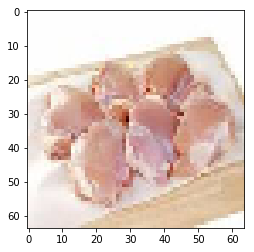

In [59]:
image_path = os.path.join("download.jpg")
test_image = image.load_img(image_path, target_size=(64,64))
x = image.img_to_array(test_image)
x = np.expand_dims(x, axis=0)
# test_image = preprocess_input(x)
# { 
# '1': 'chicken'
#  }

prediction = class_index_to_class[classifier.predict_classes(x)[0]]
# predictions = classifier.predict_classes(training_set.class_indices x)
plt.imshow(test_image)
# print('Predicted:', decode_predictions(predictions, top=5)[0])
print(prediction)

# classifier.predict_classes

In [60]:
print(class_index_to_class)

{0: 'Apple', 1: 'Asparagus', 2: 'Avocado', 3: 'Banana', 4: 'Brown-Cap-Mushroom', 5: 'Cabbage', 6: 'Carrots', 7: 'Chicken Breast', 8: 'Chicken Legs', 9: 'Chicken Thigh', 10: 'Cod', 11: 'Cucumber', 12: 'Eggplant', 13: 'Fish', 14: 'Garlic', 15: 'Ginger', 16: 'Ground Beef', 17: 'Juice', 18: 'Kiwi', 19: 'Leek', 20: 'Lemon', 21: 'Lime', 22: 'Mango', 23: 'Melon', 24: 'Nectarine', 25: 'Oat-Milk', 26: 'Oatghurt', 27: 'Onion', 28: 'Orange', 29: 'Papaya', 30: 'Passion-Fruit', 31: 'Peach', 32: 'Pear', 33: 'Pepper', 34: 'Pineapple', 35: 'Plum', 36: 'Pomegranate', 37: 'Potato', 38: 'Red-Beet', 39: 'Red-Grapefruit', 40: 'Rice', 41: 'Rice Noodles', 42: 'Salmon', 43: 'Satsumas', 44: 'Sour-Cream', 45: 'Sour-Milk', 46: 'Soy-Milk', 47: 'Soyghurt', 48: 'Steak', 49: 'Talapia', 50: 'Tomato', 51: 'Tuna', 52: 'Yoghurt', 53: 'Zucchini', 54: 'black_beans', 55: 'butter', 56: 'cheddar_cheese', 57: 'coconut_milk', 58: 'cottage_cheese', 59: 'egg', 60: 'kidney_bean', 61: 'lentils', 62: 'milk', 63: 'mozzarella_cheese'

In [45]:
for pred in predictions:
    for p in pred:
        if p >= .2:
            print(p)